## 1. Generating two classes of random points in a 2D plane

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# generate two classes
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(  
    mean=[0, 3],   
    cov=[[1, 0.5],[0.5, 1]],   
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(  
    mean=[3, 0],   
    cov=[[1, 0.5],[0.5, 1]],  
    size=num_samples_per_class)

# stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples), dtype="float32")


# Generate the corresponding targets (0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
             np.ones((num_samples_per_class, 1), dtype="float32")))

targets.shape

(2000, 1)

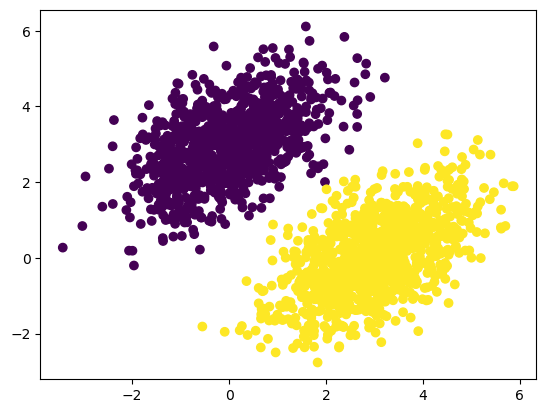

In [6]:
# Plot in matplotlib 
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()


## 2.  Creating the linear classifier variables

In [7]:
# --- Layer Dimensions ---
input_dim = 2   # Number of input features
output_dim = 1  # Number of output neurons

# --- Trainable Parameters ---
# W: The weights matrix, initialized with random values to begin training.
# Its shape (2, 1) maps the inputs to the output.
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# b: The bias vector, initialized to zeros. It allows the model to shift its output.
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

print(W.shape)
print(b.shape)

(2, 1)
(1,)


## 3. The forward pass function

In [8]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## 4. The mean sqaared error loss function

In [9]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   
    return tf.reduce_mean(per_sample_losses) # compute the mean of the loss

## 5. The training step function

In [10]:
# A hyperparameter that controls how large of a step to take during optimization.
learning_rate = 0.1

def training_step(inputs, targets):
    """Performs a single step of gradient descent to update the model's parameters."""
    
    # Use a GradientTape to "record" operations for automatic differentiation.
    with tf.GradientTape() as tape:
        # 1. Forward Pass: Feed inputs through the model to get predictions.
        predictions = model(inputs)
        # 2. Calculate the loss for this batch.
        loss = square_loss(predictions, targets)
        
    # 3. Backward Pass: Retrieve gradients of the loss with respect to W and b.
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    
    # 4. Gradient Descent: Update the model's parameters.
    # assign_sub() is a method in TensorFlow that subtracts a value from a variable 
    # and assigns the result back to the original variable.
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    # Return the loss for this step, which is useful for monitoring.
    return loss

## 6. The batch train loop

In [11]:
print(inputs)
print("-----------")
print(targets)

[[-0.38930136  3.9419866 ]
 [ 0.05749265  3.5327847 ]
 [-0.15845327  1.0284154 ]
 ...
 [ 2.2177572   0.56226534]
 [ 4.2318707   1.575244  ]
 [ 0.9602201  -2.5000782 ]]
-----------
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [12]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.3660
Loss at step 1: 0.7882
Loss at step 2: 0.2372
Loss at step 3: 0.1555
Loss at step 4: 0.1357
Loss at step 5: 0.1246
Loss at step 6: 0.1155
Loss at step 7: 0.1074
Loss at step 8: 0.0999
Loss at step 9: 0.0931
Loss at step 10: 0.0870
Loss at step 11: 0.0813
Loss at step 12: 0.0762
Loss at step 13: 0.0715
Loss at step 14: 0.0673
Loss at step 15: 0.0634
Loss at step 16: 0.0599
Loss at step 17: 0.0567
Loss at step 18: 0.0537
Loss at step 19: 0.0511
Loss at step 20: 0.0486
Loss at step 21: 0.0464
Loss at step 22: 0.0444
Loss at step 23: 0.0425
Loss at step 24: 0.0409
Loss at step 25: 0.0393
Loss at step 26: 0.0379
Loss at step 27: 0.0367
Loss at step 28: 0.0355
Loss at step 29: 0.0345
Loss at step 30: 0.0335
Loss at step 31: 0.0326
Loss at step 32: 0.0318
Loss at step 33: 0.0311
Loss at step 34: 0.0304
Loss at step 35: 0.0298
Loss at step 36: 0.0293
Loss at step 37: 0.0288
Loss at step 38: 0.0283
Loss at step 39: 0.0279


In [13]:
# The fitted value

print(W.numpy())
print(b.numpy())

[[ 0.18311207]
 [-0.11946065]]
[0.37905732]


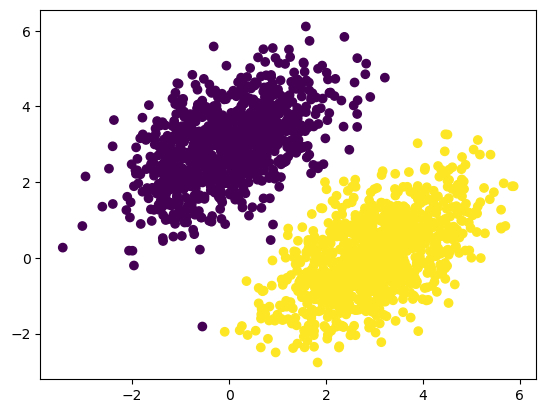

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

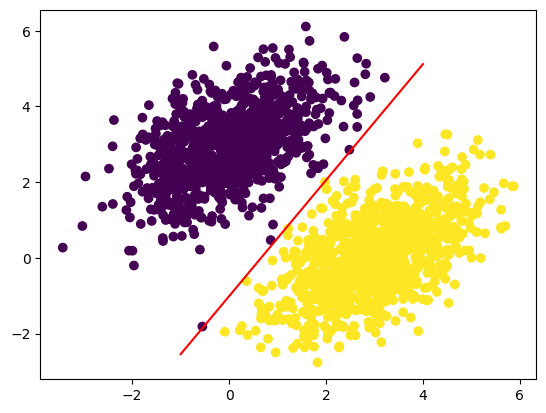

In [15]:
# Draw the boundary
x = np.linspace(-1, 4, 100)   
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]  
plt.plot(x, y, "-r")           
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## *Train Test Split on the datasets

In [16]:
from tensorflow import keras

In [ ]:
# Define a simple linear model (1 neuron, 1 layer).
model = keras.Sequential([keras.layers.Dense(1)])

# Configure the model's learning process.
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1), # How the model updates based on data.
              loss=keras.losses.MeanSquaredError(),                   # The error function to minimize.
              metrics=[keras.metrics.BinaryAccuracy()]) 

In [ ]:
# 1. Create a randomly shuffled sequence of indices.
indices_permutation = np.random.permutation(len(inputs))

# 2. Reorder the inputs using the shuffled indices.
shuffled_inputs = inputs[indices_permutation]

# 3. Reorder the targets using the same shuffled indices.
shuffled_targets = targets[indices_permutation]

In [19]:
num_validation_samples = int(0.3 * len(inputs))    
val_inputs = shuffled_inputs[:num_validation_samples]   
val_targets = shuffled_targets[:num_validation_samples]   
training_inputs = shuffled_inputs[num_validation_samples:]   
training_targets = shuffled_targets[num_validation_samples:]

In [22]:
model.fit(
    training_inputs,
    training_targets,
    epochs = 4,
    batch_size = 16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/4
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9429 - loss: 0.0810 - val_binary_accuracy: 0.9600 - val_loss: 0.0791
Epoch 2/4
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - binary_accuracy: 0.9487 - loss: 0.0794 - val_binary_accuracy: 0.9950 - val_loss: 0.0369
Epoch 3/4
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - binary_accuracy: 0.9629 - loss: 0.0644 - val_binary_accuracy: 0.9983 - val_loss: 0.0368
Epoch 4/4
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - binary_accuracy: 0.9562 - loss: 0.0733 - val_binary_accuracy: 1.0000 - val_loss: 0.0283


In [ ]:
# compute the validation loss
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size = 200)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 1.0000 - loss: 0.0282 


In [ ]:
# Make prediction
# batch_size prevent out-of-memory errors. 
# The batch_size breaks the large validation dataset (val_inputs) into smaller, manageable chunks. 
predictions = model.predict(val_inputs, batch_size=600)

print(predictions[:10])

print([len(val_inputs), len(predictions)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[ 0.2685015 ]
 [-0.0731979 ]
 [ 0.8377115 ]
 [ 0.02683967]
 [-0.08299637]
 [ 0.32583725]
 [ 1.005636  ]
 [ 0.76148033]
 [ 0.05218324]
 [ 0.7271131 ]]
[600, 600]
